In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
#from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector
from collections import Counter
from qiskit.providers.aer import AerSimulator
from qiskit.circuit.library import DraperQFTAdder, XGate, ZGate

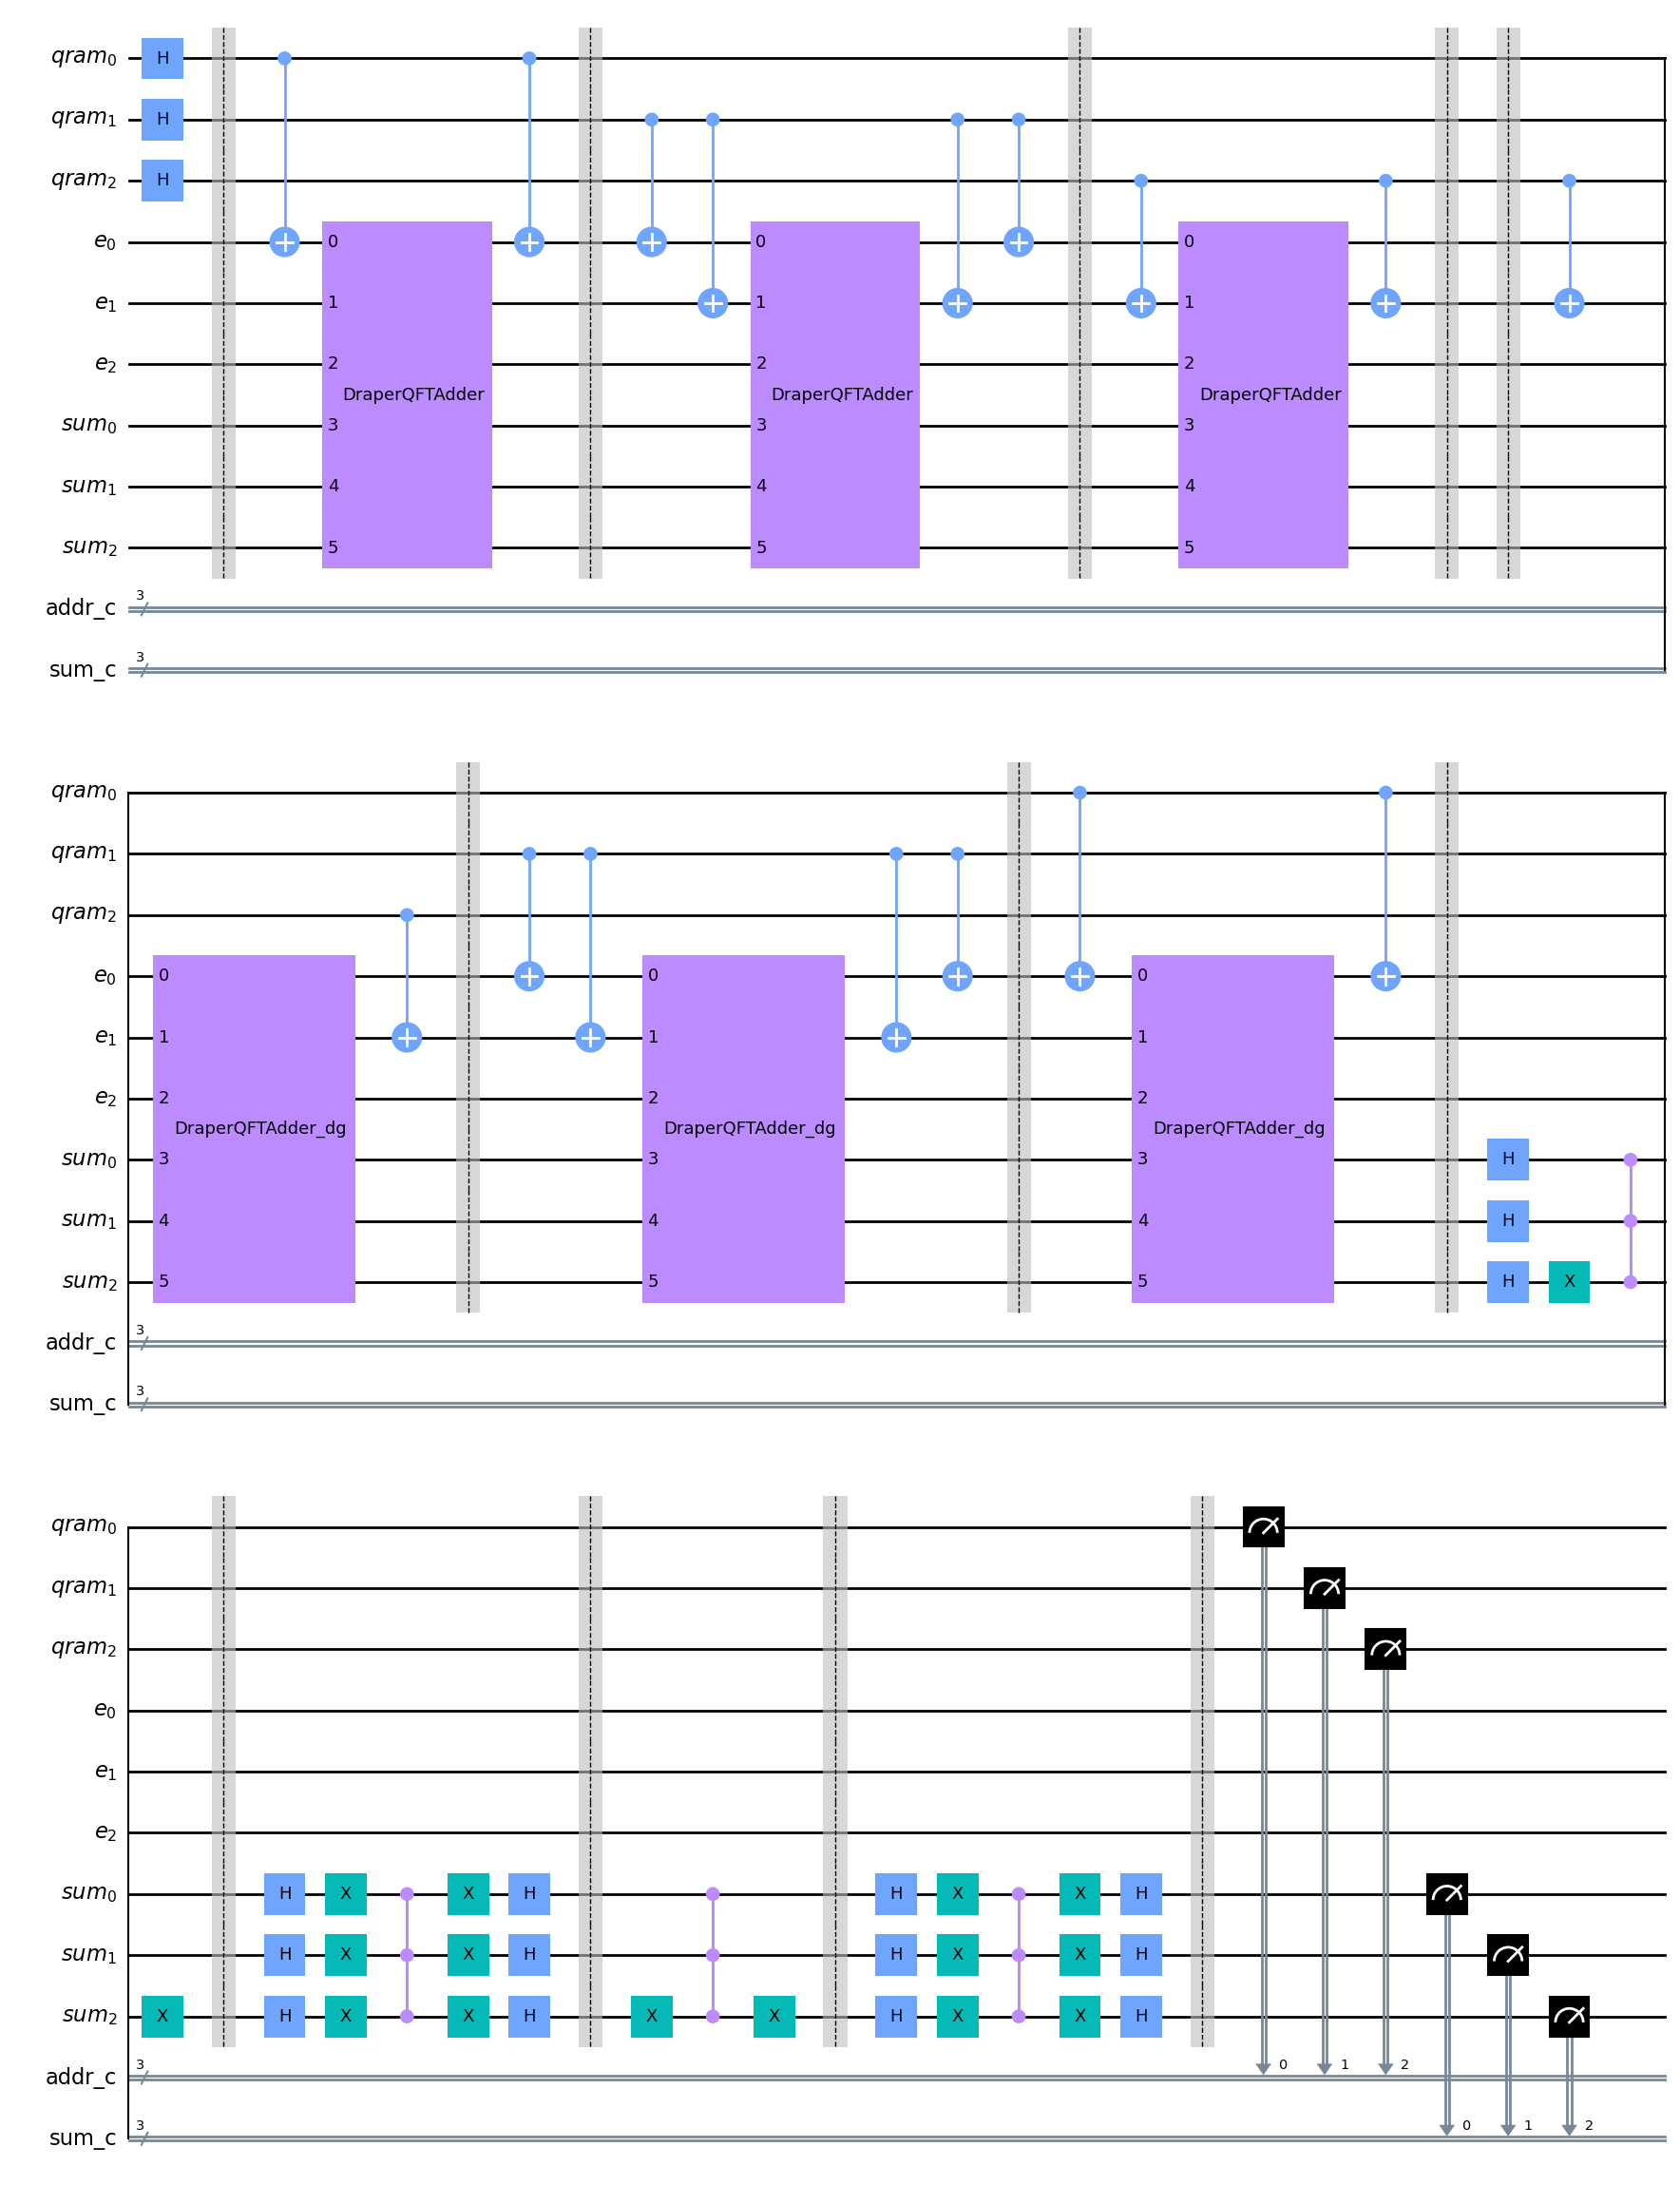

In [ ]:
#[1 3 2]
# sum 3 |101>|3>  |010>|3>
#3 address 2 value adder 3 sum 
l = [1,3,2]
K=2
# what is K?
# quantum counting an algorithm that uses phase estimation to find K
target_sum = 3
n = len(l)
qram_register = QuantumRegister(n, "qram")
list_element_register = QuantumRegister(3, "e")
sum_register = QuantumRegister(3, "sum") # TODO: unhardcode the size of the sum register
addr_classical_register = ClassicalRegister(3, "addr_c") # TODO: unhardcode the size of the sum register
sum_classical_register = ClassicalRegister(3, "sum_c") # TODO: unhardcode the size of the sum register
qc = QuantumCircuit(qram_register, list_element_register, sum_register, addr_classical_register, sum_classical_register)
qc3 = QuantumCircuit(qram_register, list_element_register, sum_register, addr_classical_register, sum_classical_register)
#

qc.barrier()


draper_circuit = DraperQFTAdder(3)
#encode first element    
qc.cx(qram_register[0], list_element_register[0])
qc.append(draper_circuit, list(list_element_register) + list(sum_register))
qc.cx(qram_register[0], list_element_register[0]) # clean up my garbage)
qc.barrier()
# encoding 3
qc.cx(qram_register[1], list_element_register[0])
qc.cx(qram_register[1], list_element_register[1])
qc.append(draper_circuit, list(list_element_register) + list(sum_register))
qc.cx(qram_register[1], list_element_register[1])
qc.cx(qram_register[1], list_element_register[0])
qc.barrier()
# encoding 2
qc.cx(qram_register[2], list_element_register[1])
qc.append(draper_circuit, list(list_element_register) + list(sum_register))
qc.cx(qram_register[2], list_element_register[1]) # clean up my garbage)
qc.barrier()

qc_inverse = qc.inverse()
qc3.h(qram_register)
qc = qc.compose(qc_inverse)
##gorver search 
qc.h(sum_register)
qc.x(sum_register[2])
qc.append(ZGate().control(2),sum_register)
qc.x(sum_register[2])
qc.barrier()
qc.h(sum_register)
qc.x(sum_register)
qc.append(ZGate().control(2),sum_register)
qc.x(sum_register)
qc.h(sum_register)
qc.barrier()
qc.x(sum_register[2])
qc.append(ZGate().control(2),sum_register)
qc.x(sum_register[2])
qc.barrier()
qc.h(sum_register)
qc.x(sum_register)
qc.append(ZGate().control(2),sum_register)
qc.x(sum_register)
qc.h(sum_register)
qc.barrier()

qc.measure(qram_register,addr_classical_register)
qc.measure(sum_register,sum_classical_register)

qc3 = qc3.compose(qc)


qc3.draw('mpl')


In [50]:
backend = AerSimulator(method='density_matrix')
shots = 100000
results = execute(qc3, backend=backend, shots=shots).result()
answer = results.get_counts()
for (key, value) in answer.items():
    #print(''.join(list(reversed(key))), value)
    print(key, value)
# sum = 4, addr = 11000؟
# sum = 0, addr = 00000


110 000 84
111 110 94
101 110 96
010 100 114
010 111 94
001 110 94
011 111 11770
011 011 11861
101 010 98
101 100 97
001 111 96
000 111 114
001 100 111
111 101 96
001 000 101
111 100 93
010 110 80
110 011 90
000 101 98
001 001 111
100 100 83
111 011 98
001 011 112
011 000 11755
011 100 11791
110 010 120
101 101 109
000 000 91
011 110 11994
111 000 98
100 010 81
111 010 91
000 110 94
010 001 71
100 101 111
000 011 83
100 111 98
000 100 96
101 011 99
100 000 82
100 110 82
010 000 95
010 011 95
110 001 108
001 010 80
111 001 97
110 111 93
001 101 129
111 111 96
101 001 86
101 111 94
010 010 99
110 101 94
000 010 81
100 011 103
110 110 96
011 010 11774
011 101 11735
000 001 98
010 101 94
100 001 98
110 100 90
011 001 11919
101 000 115
